In [1]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

/usr/lib64/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load dataset
var = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv('DataBase/ForModelCamparison.csv', names=var)
array = dataframe.values

X = array[:,0:8]
y = array[:,8]

In [3]:
# prepare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Regression', LogisticRegression()))
models.append(('Linear Discriminant', LinearDiscriminantAnalysis()))
models.append(('K Neighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Randomforest', RandomForestClassifier()))
models.append(('SVM', SVC(C=1, gamma=0.0001)))

In [4]:
# prepare configuration for cross validation test harness
seed = 3591
# Validate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: \t %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 	 0.769515 (0.048411)
Linear Regression: 	 0.769515 (0.048411)
Linear Discriminant: 	 0.773462 (0.051592)
K Neighbors Classifier: 	 0.726555 (0.061821)
Decision Tree: 	 0.690038 (0.063101)
Randomforest: 	 0.746036 (0.050381)
SVM: 	 0.761722 (0.052578)


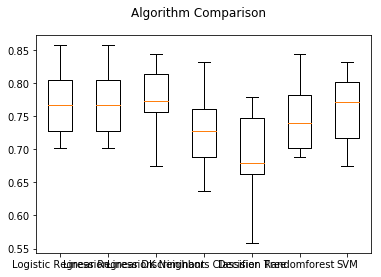

In [5]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [6]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==1 and y_actual!=y_hat[i]:
           FP += 1
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==0:
           TN += 1
    for i in range(len(y_hat)): 
        if y_hat[i]==0 and y_actual!=y_hat[i]:
           FN += 1
    return 'Sen.:{:.4f}'.format(TP/(TP+FP*1.0)),'PPV.:{:.4f}'.format(TP/(TP+FN*1.0)), 'Spe.:{:.4f}'.format(TN/(TN+FN*1.0)),'NPV.:{:.4f}'.format(TN/(TN+FP*1.0))

In [12]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.20)
for name, model in models:
    md = model
    md.fit(Xtr, ytr)
    print('✪',name,'>>')
#     print('\t * Vars Importancy :\t', list(var[i] for i in clf.feature_importances_.argsort()[-6:][::-1].tolist()))
    print('\t * Train Accuracy :\t', np.mean(md.predict(Xtr) == ytr),'\n\t\t\t\t★', perf_measure(ytr.tolist(), md.predict(Xtr).tolist()))
    print('\t * Test Accuracy :\t', np.mean(md.predict(Xte) == yte),'\n\t\t\t\t★', perf_measure(yte.tolist(), md.predict(Xte).tolist()))

✪ Logistic Regression >>
	 * Train Accuracy :	 0.773615635179 
				★ ('Sen.:0.4220', 'PPV.:0.2088', 'Spe.:0.4411', 'NPV.:0.6859')
	 * Test Accuracy :	 0.792207792208 
				★ ('Sen.:0.4412', 'PPV.:0.2055', 'Spe.:0.4423', 'NPV.:0.7077')
✪ Linear Regression >>
	 * Train Accuracy :	 0.773615635179 
				★ ('Sen.:0.4220', 'PPV.:0.2088', 'Spe.:0.4411', 'NPV.:0.6859')
	 * Test Accuracy :	 0.792207792208 
				★ ('Sen.:0.4412', 'PPV.:0.2055', 'Spe.:0.4423', 'NPV.:0.7077')
✪ Linear Discriminant >>
	 * Train Accuracy :	 0.768729641694 
				★ ('Sen.:0.4158', 'PPV.:0.2142', 'Spe.:0.4415', 'NPV.:0.6737')
	 * Test Accuracy :	 0.798701298701 
				★ ('Sen.:0.4304', 'PPV.:0.2378', 'Spe.:0.4495', 'NPV.:0.6642')
✪ K Neighbors Classifier >>
	 * Train Accuracy :	 0.791530944625 
				★ ('Sen.:0.4215', 'PPV.:0.2433', 'Spe.:0.4503', 'NPV.:0.6499')
	 * Test Accuracy :	 0.714285714286 
				★ ('Sen.:0.3766', 'PPV.:0.2148', 'Spe.:0.4332', 'NPV.:0.6279')
✪ Decision Tree >>
	 * Train Accuracy :	 1.0 
				★ ('Sen.:0.50